In [1]:
#importing lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing data
df = pd.read_excel('D:\Datasets\Chinese Public Diplomacy Projects Dataset\ChineseFinancialPublicDiplomacyProjectDetails_geocoded.xlsx')


In [ ]:
df.head() #checking top rows of the table
df.isnull().sum() #checking for nulls
df.duplicated().sum() #findings duplicates
df.drop_duplicates(inplace=True) #dropping duplicates
df.describe() #summary statistics
df.info() #data types
df['project_id'].isnull().sum() #checking for nulls

In [ ]:
#some of the projects are missing amounts, so we will fill them with the median amount
median_amount = df['amount'].median()
df['amount'] = df['amount'].fillna(median_amount)

In [10]:
#count the occurrences of each category
category_distribution_sorted = df['category'].value_counts()
category_distribution_sorted

category
Infrastructure Investments    869
Humanitarian Assistance       294
None of the above              98
Budget Support                 26
Debt Relief                    21
Name: count, dtype: int64

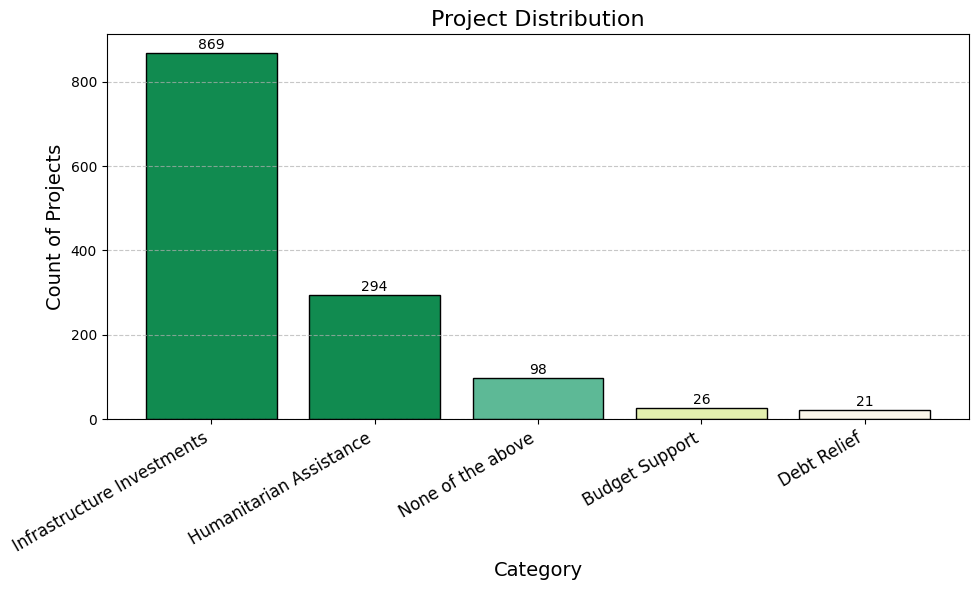

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

#giving colors
colors = ['#118B50','#118B50', '#5DB996', '#E3F0AF', '#FBF6E9'][:len(category_distribution_sorted)]

#plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(category_distribution_sorted.index, category_distribution_sorted.values, color=colors, edgecolor='black')

#adding values on top of each bar
for i, value in enumerate(category_distribution_sorted.values):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

ax.set_title('Project Distribution', fontsize=16, color='black')
ax.set_xlabel('Category', fontsize=14, color='black')
ax.set_ylabel('Count of Projects', fontsize=14, color='black')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

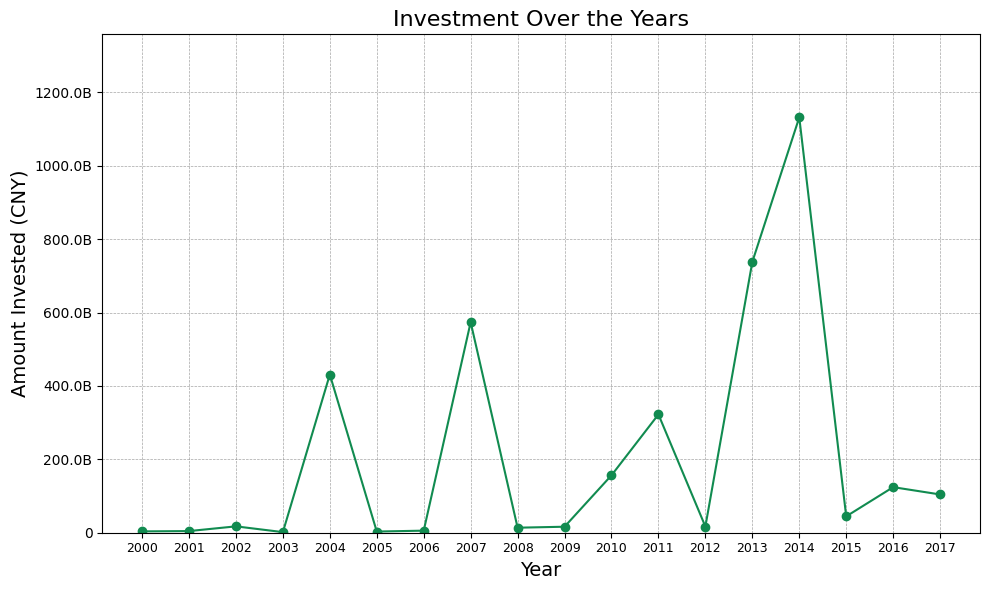

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Money_Invested = df.groupby('year')['amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(Money_Invested.index, Money_Invested.values, color='#118B50', marker='o')

#adding titles
plt.title('Investment Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Invested (CNY)', fontsize=14)

plt.ylim(0, Money_Invested.values.max() * 1.2)
plt.xticks(Money_Invested.index, Money_Invested.index.astype(int), fontsize=9)

def y_axis_format(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_format))
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


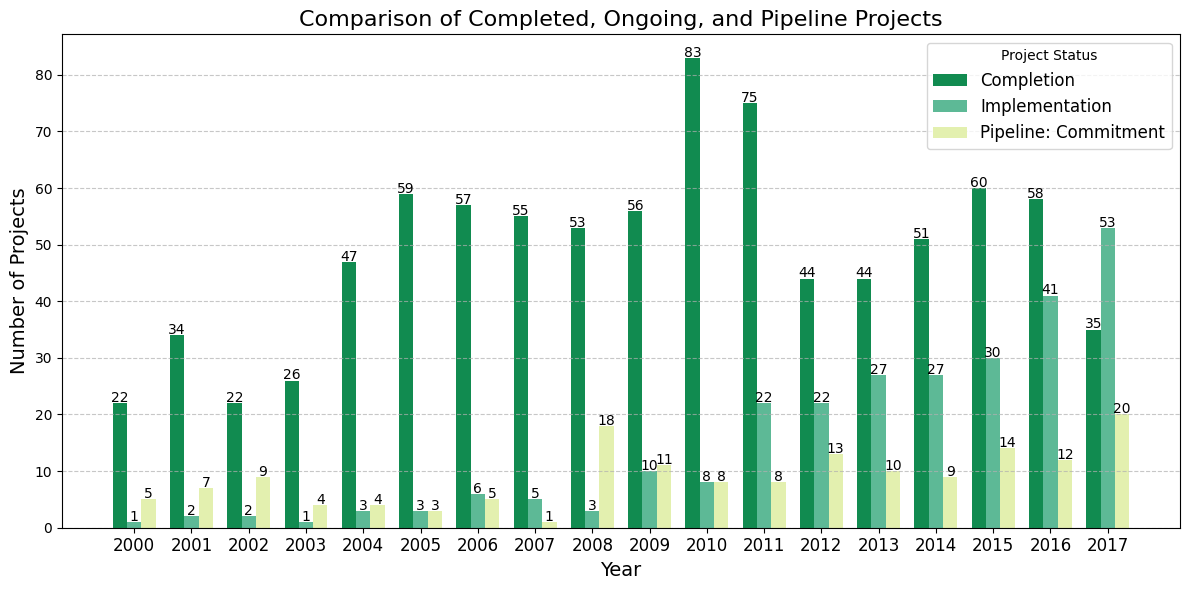

In [11]:
#grouping data by year and status, then count the number of projects
status_counts = df.groupby(['year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
years = status_counts.index
x = np.arange(len(years))
width = 0.25

statuses = status_counts.columns
colors = ['#118B50', '#5DB996', '#E3F0AF'] 

for i, status in enumerate(statuses):
    plt.bar(x + i * width, status_counts[status], width=width, label=status, color=colors[i])

plt.title("Comparison of Completed, Ongoing, and Pipeline Projects", fontsize=16, color='black')
plt.xlabel("Year", fontsize=14, color='black')
plt.ylabel("Number of Projects", fontsize=14, color='black')
plt.xticks(x + width, years, fontsize=12)
plt.legend(title="Project Status", fontsize=12)

for i, status in enumerate(statuses):
    for x_pos, y_val in zip(x + i * width, status_counts[status]):
        plt.text(x_pos, y_val + 0.2, str(y_val), ha='center', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

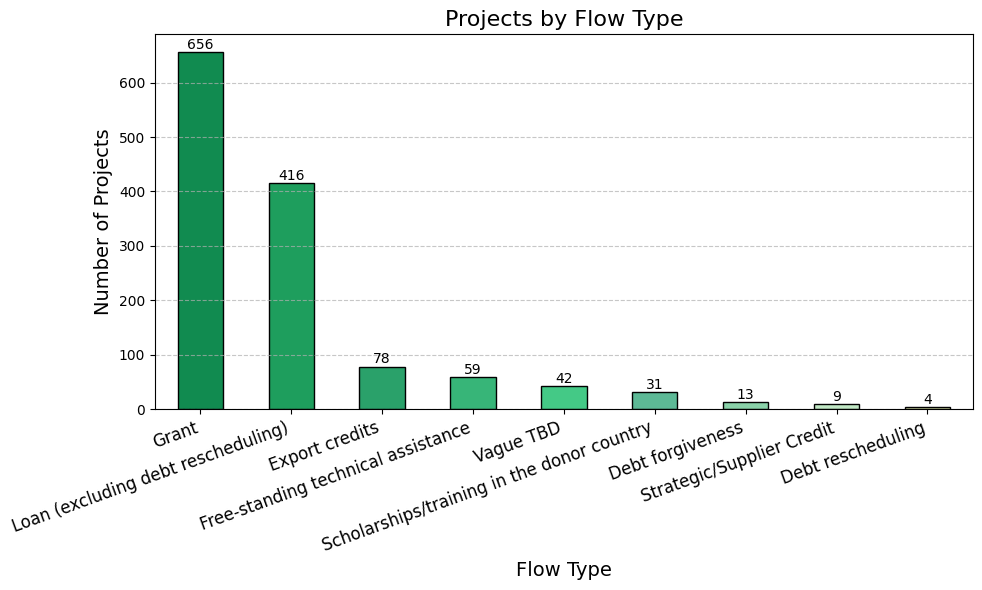

In [18]:
import matplotlib.pyplot as plt

Projects_Flow_Type = df['flow'].value_counts()
colors = ['#118B50', '#1E9E5D', '#2AA16A', '#37B578', '#44C986','#5DB996', '#8AD2A9', '#C1E8C5', '#E3F0AF'][:len(Projects_Flow_Type)]

plt.figure(figsize=(10, 6))
bars = Projects_Flow_Type.plot(kind='bar', color=colors, edgecolor='black')

for i, value in enumerate(Projects_Flow_Type):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=20, ha='right', fontsize=12)
plt.title("Projects by Flow Type", fontsize=16, color='black')
plt.xlabel("Flow Type", fontsize=14, color='black')
plt.ylabel("Number of Projects", fontsize=14, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


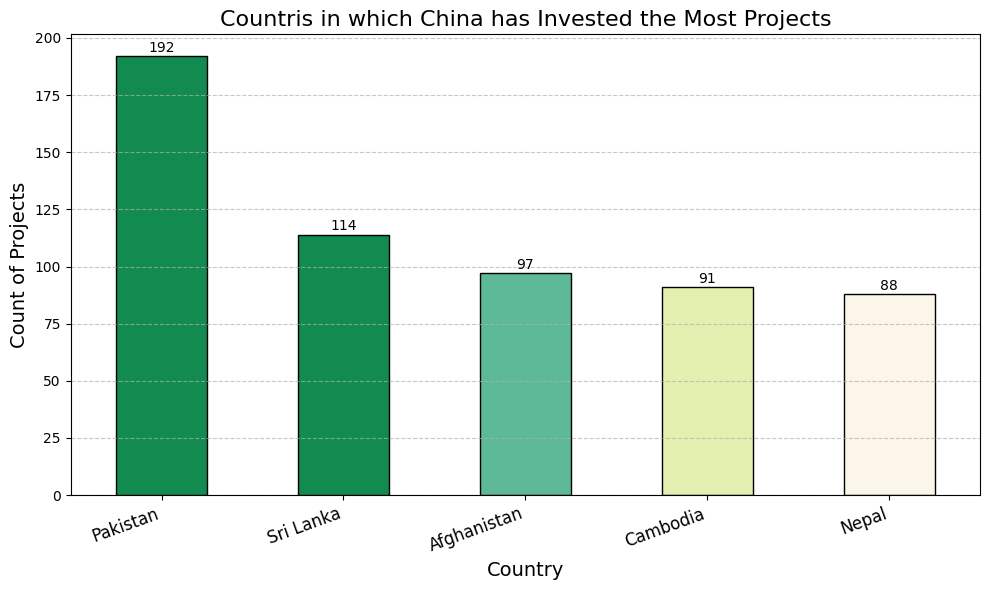

In [37]:
#top 5 countreis in which china has invested the most projects
Top_5_countries = df['recipient_condensed'].value_counts().head(5)

#giving colors
colors = ['#118B50', '#118B50', '#5DB996', '#E3F0AF', '#FBF6E9'][:len(Top_5_countries)]

plt.figure(figsize=(10, 6))
bars = Top_5_countries.plot(kind='bar', color=colors, edgecolor='black')

for i, value in enumerate(Top_5_countries):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

#adding labels
plt.xticks(rotation=20, ha='right', fontsize=12)
plt.title("Countris in which China has Invested the Most Projects", fontsize=16, color='black')
plt.xlabel("Country", fontsize=14, color='black')
plt.ylabel("Count of Projects", fontsize=14, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [51]:
#total amount of all projects for each country by china
country_funding = df.groupby('recipient_condensed')['amount'].sum().reset_index()
country_funding.sort_values('amount', ascending=False, inplace=True)
country_funding

,recipient_condensed,amount
10,Laos,2.164992e+12
7,Indonesia,1.106734e+12
19,Pakistan,1.486080e+11
23,Sri Lanka,6.378487e+10
11,Malaysia,4.756043e+10
1,Bangladesh,4.525715e+10
8,Kazakhstan,3.052976e+10
21,Philippines,2.632704e+10
3,Cambodia,1.133401e+10
6,India,9.744830e+09


In [2]:
#Bubble chart for total funding per country (the bigger the bubble the more the funding)
import plotly.express as px

country_funding = df.groupby("recipient_condensed", as_index=False)["amount"].sum()
country_funding.rename(columns={"amount": "total_funding"}, inplace=True)

#creating chart
fig = px.scatter_geo(
    country_funding,
    locations="recipient_condensed", 
    locationmode="country names",   
    size="total_funding",          
    projection="natural earth",     
    title="Total Funding Per Country",
    labels={"total_funding": "Total Funding"},
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color="darkgreen")))
fig.update_layout(
    title=dict(x=0.5),
    geo=dict(showframe=False, showcoastlines=True),
)
fig.show()

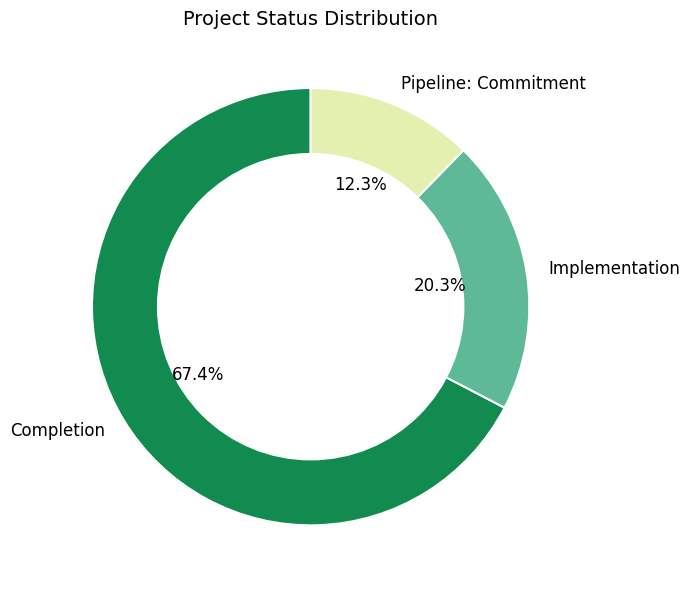

In [16]:
##Projects Status 
Projects_Status = df['status'].value_counts()

Projects_Status.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#118B50', '#5DB996', '#E3F0AF'],
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 12},
    figsize=(8, 6),)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.ylabel('')
plt.tight_layout()
plt.show()